# Проект "Реклама Procrastinate Pro+"

Задачей проекта является исследование расходов на рекламу приложения Procrastinate Pro+, терпящего последние несколько месяцев убытки, и выяснение причин происходящего.

В распоряжении имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Необходимо выяснить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### 1. Загрузка данных 

#### 1.1 Загрузка библиотек

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import plotly.express as px

#Для корректного отображения графиков plotly установлю библиотеки для перевода графиков в формат картинки
!pip install -U kaleido==0.2.1
import kaleido
import plotly.io as pio
pio.renderers.default = 'png'

#### Загрузка датасетов

In [2]:
#для работы онлайн и локально
try:
    visits, orders, costs = (
    pd.read_csv('...'),  # визиты
    pd.read_csv('...'),  # заказы
    pd.read_csv('...'),  # расходы     
)
except:
    visits, orders, costs = (
    pd.read_csv('...'),  # визиты
    pd.read_csv('...'),  # заказы
    pd.read_csv('...'),  # расходы     
)
display(visits)
display(orders)
costs

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


#### 1.3 Предобработка

##### 1.3.1 Дубликаты

In [3]:
print('Явные дубликаты visits:',visits.duplicated().sum())
print('Явные дубликаты orders:',orders.duplicated().sum())
print('Явные дубликаты costs:',costs.duplicated().sum())

Явные дубликаты visits: 0
Явные дубликаты orders: 0
Явные дубликаты costs: 0


In [4]:
print('Неявные дубликаты в visits:')
display(visits['Region'].unique())
display(visits['Device'].unique())
display(visits['Channel'].unique())
print('Неявные дубликаты в costs:')
display(costs['Channel'].unique())

#Неявные дубликаты отсутствуют

Неявные дубликаты в visits:


array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Неявные дубликаты в costs:


array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

##### 1.3.2 Пропуски

In [5]:
print('Пропуски в visits:')
display(visits.isna().sum())
print('Пропуски в orders:')
display(orders.isna().sum())
print('Пропуски в costs:')
display(costs.isna().sum())

Пропуски в visits:


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Пропуски в orders:


User Id     0
Event Dt    0
Revenue     0
dtype: int64

Пропуски в costs:


dt         0
Channel    0
costs      0
dtype: int64

##### 1.3.3 Типы данных

In [6]:
print('Типы данных в visits:')
display(visits.dtypes)
print('Типы данных в orders:')
display(orders.dtypes)
print('Типы данных в costs:')
display(costs.dtypes)

Типы данных в visits:


User Id           int64
Region           object
Device           object
Channel          object
Session Start    object
Session End      object
dtype: object

Типы данных в orders:


User Id       int64
Event Dt     object
Revenue     float64
dtype: object

Типы данных в costs:


dt          object
Channel     object
costs      float64
dtype: object

##### 1.3.4 Форматирование названий столбцов

In [7]:
visits.rename(columns={'User Id':'user_id', 
                       'Region':'region',
                       'Device':'device',
                       'Channel':'channel',
                       'Session Start':'session_start',
                       'Session End':'session_end'}, inplace = True )

orders.rename(columns={'User Id':'user_id', 
                       'Event Dt':'event_dt',
                       'Device':'device',
                       'Revenue':'revenue'}, inplace = True )

costs.rename(columns={'Channel':'channel'}, inplace = True )

##### 1.3.5 Форматирование столбцов с датой

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [9]:
#Проверка
print('Типы данных в visits:')
display(visits.dtypes)

print('Типы данных в orders:')
display(orders.dtypes)

print('Типы данных в costs:')
display(costs.dtypes)

Типы данных в visits:


user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

Типы данных в orders:


user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

Типы данных в costs:


dt          object
channel     object
costs      float64
dtype: object

### 2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Пропишем функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### 2.1 Функции для рассчет метрик

##### 2.1.1 Cоздание пользовательских профилей

In [10]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


##### 2.1.2 Расчёт удержания

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### 2.1.3 Расчёт конверсии

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

##### 2.1.4 Расчёт LTV и ROI

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

##### 2.1.5 Момент анализа и горизонт анализа

In [14]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

#### 2.2 Функции для визуализации метрик

Внес изменения в существующие функции, чтобы выдвинуть легенды за пределы графиков, так как они заслоняли график.

##### 2.2.1 Cглаживание фрейма

In [15]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

##### 2.2.2 Визуализация удержания

In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
  
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

##### 2.2.3 Визуализация конверсии

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

##### 2.2.4 Визуализация LTV и ROI

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
  
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### 3. Исследовательский анализ данных

Задачи:
- Составление профилей пользователей. Определение минимальной и максимальной дат привлечения пользователей.
- Определение стран, из которых пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
- Определение устройств, которыми пользуются клиенты и какие устройства предпочитают платящие пользователи. 
- Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. 

#### 3.1 Профили пользователей и даты привлечения

In [19]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


#### 3.2 Даты привлечения - max и min

In [20]:
print('Минимальная дата привлечения пользователя:',profiles['first_ts'].min())
print('Максимальная дата привлечения пользователя:',profiles['first_ts'].max())

Минимальная дата привлечения пользователя: 2019-05-01 00:00:41
Максимальная дата привлечения пользователя: 2019-10-27 23:59:04


**Вывод**: Даты привлечения пользователей соответствуют заданном диапазону дат  - с **01.05.2019** по **27.10.2019**

#### 3.3 Страны

In [21]:
profiles.dtypes

user_id                      int64
first_ts            datetime64[ns]
channel                     object
device                      object
region                      object
dt                          object
month               datetime64[ns]
payer                         bool
acquisition_cost           float64
dtype: object

In [22]:
def func_name(table, column):
    table = table.pivot_table(index = column, values = ['payer'], aggfunc = ['mean','count']).reset_index()
    table.columns = list(map("_".join, table.columns))
    table['mean_payer'] = table['mean_payer'].apply(lambda x: '{:.2%}'.format(x))
    return table

In [23]:
display(func_name(profiles,['region']))
display(func_name(profiles,['device']))
display(func_name(profiles,['channel']))

,region_,mean_payer,count_payer
0,France,3.80%,17450
1,Germany,4.11%,14981
2,UK,3.98%,17575
3,United States,6.90%,100002


,device_,mean_payer,count_payer
0,Android,5.85%,35032
1,Mac,6.36%,30042
2,PC,5.05%,30455
3,iPhone,6.21%,54479


,channel_,mean_payer,count_payer
0,AdNonSense,11.34%,3880
1,FaceBoom,12.20%,29144
2,LeapBob,3.06%,8553
3,MediaTornado,3.57%,4364
4,OppleCreativeMedia,2.71%,8605
5,RocketSuperAds,7.91%,4448
6,TipTop,9.60%,19561
7,WahooNetBanner,5.30%,8553
8,YRabbit,3.83%,4312
9,lambdaMediaAds,10.47%,2149


In [24]:
#Напишу фукнцию, так как запрос различается только столбцами

def analize(column):
     return (profiles.groupby(column)
     .agg({'user_id': 'count',
           'payer':'mean',})
     .sort_values(by = 'user_id',
                  ascending = False))

In [25]:
region = analize('region')# смотрим регионы
region['payer'] = region['payer'].apply(lambda x: '{:.2%}'.format(x))
region

,user_id,payer
region,,
United States,100002,6.90%
UK,17575,3.98%
France,17450,3.80%
Germany,14981,4.11%


**Вывод**: **66%** пользователей приходятся на США, при этом из них платящих пользователей всего около **7%**

#### 3.4 Устройства

In [26]:
device = analize('device')
device['payer'] = device['payer'].apply(lambda x: '{:.2%}'.format(x))
device

,user_id,payer
device,,
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%
Mac,30042,6.36%


**Вывод**: 
- Большинство пользователей - **36%** - пользуются *iPhone*, Из них платящих пользователей всего около **6.2%**
- Наименьшее число пользователей - **20%** - пользуются *Mac*, но процент платящих пользователей выше, чем у iPhone - **6.3%**


#### 3.5 Каналы привлечения

In [27]:
channel = analize('channel')#смотрим каналы привлечения
channel['payer'] = channel['payer'].apply(lambda x: '{:.2%}'.format(x))
channel

,user_id,payer
channel,,
organic,56439,2.06%
FaceBoom,29144,12.20%
TipTop,19561,9.60%
OppleCreativeMedia,8605,2.71%
LeapBob,8553,3.06%
WahooNetBanner,8553,5.30%
RocketSuperAds,4448,7.91%
MediaTornado,4364,3.57%
YRabbit,4312,3.83%


**Вывод**: 
- Большинство пользователей - **37%** - пришли *сами*, но процент платящих пользователей самый низкий - **2%**
- Следом по численности - **19,5%** - идут пользователи,привлеченные через *FaceBoom*.
- *FaceBoom* имеют самый большой процент платящих пользователей - **12,2%**
- Самые малочисленные категории - *AdNonSense* (**11,3%**) и *lambdaMediaAds* (**10,5%**) имеют большой процент платящих пользователей, но вероятно это обусловлено малочисленностью группп - **2,5%** и **1,4%** соответственно.

### 4. Маркетинг

- Считаем общую сумму расходов на маркетинг.
- Выяснияем, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Строим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Вычисляем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника, с помощью профилей пользователей.

#### 4.1 Общая сумма расходов на маркетинг

In [28]:
print("Общая сумма расходов на маркетинг составляет:",round(costs['costs'].sum()))

Общая сумма расходов на маркетинг составляет: 105497


#### 4.2 Распределение трат по источникам

In [29]:
(costs.groupby('channel')
      .agg({'costs': 'sum'})
      .sort_values(by = 'costs',
                   ascending = False)
)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Вывод**: 
- **52%** расходов приходится на *TipTop*, 
- **31%** на *FaceBoom*, вместе они составляют ***83%*** всех затрат. 
- **5%** затрат приходится на следующую за ними *WahooNetBanner* 

#### 4.3 Динамика расходов по времени

In [30]:
costs_1 = costs.copy()
costs_1.dtypes

dt          object
channel     object
costs      float64
dtype: object

In [31]:
costs_1['dt'] = pd.to_datetime(costs_1['dt'])
costs_1.dtypes

dt         datetime64[ns]
channel            object
costs             float64
dtype: object

In [32]:
costs_1['week'] = costs_1['dt'].dt.isocalendar().week
costs_1['month'] = costs_1['dt'].dt.month
costs_1

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


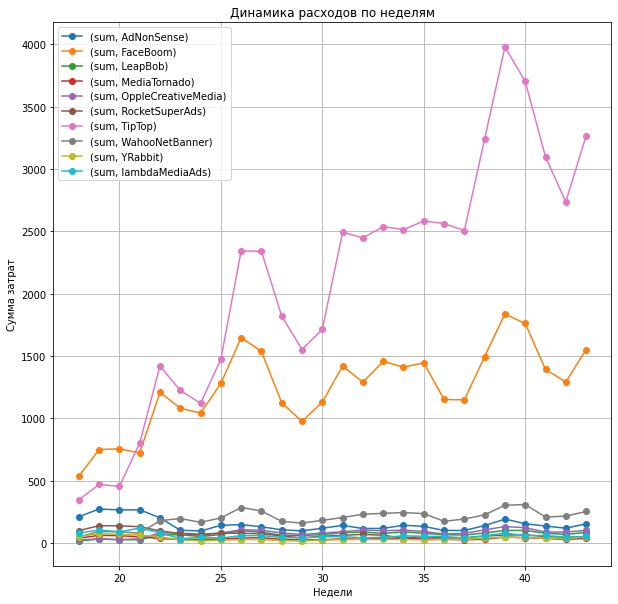

In [33]:
(costs_1.pivot_table(index = 'week',
              columns = 'channel',
              values = 'costs',
              aggfunc = ['sum'])
       .plot(kind = 'line', figsize = (10,10), grid=True, style = 'o-') 
)
plt.legend()
plt.xlabel('Недели')
plt.ylabel('Сумма затрат')
plt.title('Динамика расходов по неделям');

**Вывод:**
- Каналы TipTop и FaceBoom усиленнее других вклыдаются в рекламу. 
- TipTop вкладывает довольно большие суммы за раз в разрезе недель, FaceBoom более стабилен в суммах.

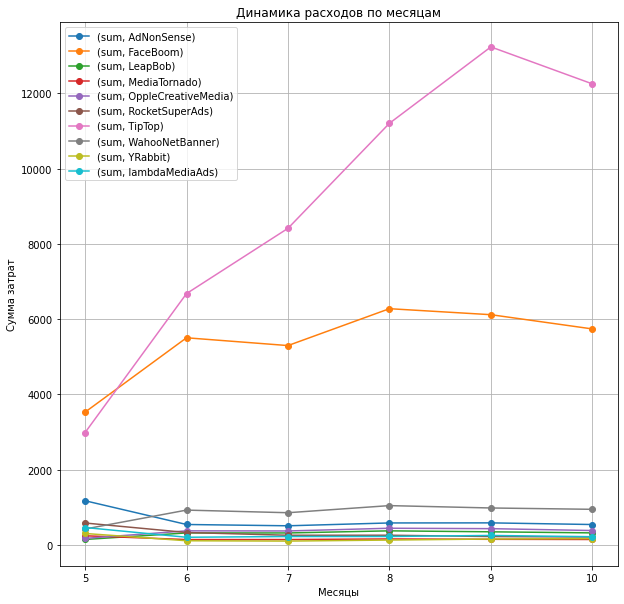

In [34]:
(costs_1.pivot_table(index = 'month',
              columns = 'channel',
              values = 'costs',
              aggfunc = ['sum'])
       .plot(kind = 'line', figsize = (10,10), grid=True, style = 'o-') 
)
plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Сумма затрат')
plt.title('Динамика расходов по месяцам');

**Вывод:**
- В месячном разрезе расходы TipTop без скачков, но стабильно повышаются. 
- Расходы FaceBoom к началу осени снижаются.

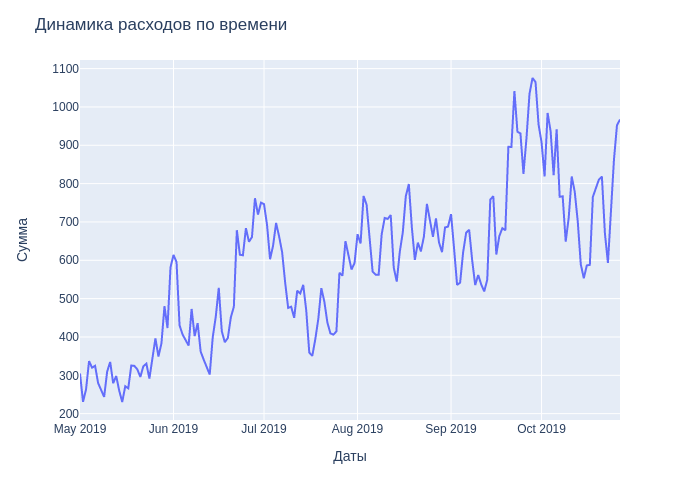

In [35]:
#Делаю группировку
cost_rate = (costs_1.groupby(['dt'])['costs']
            .sum()
            .reset_index()
         )

#Выводу график
fig = px.line(cost_rate, 
              x='dt', 
              y='costs')

fig.update_layout(title='Динамика расходов по времени',
                  xaxis_title='Даты',
                  yaxis_title='Сумма')
fig.show()

**Вывод:**
- Общие расходы на рекламу постепенно увеличиваются к концу учетного периода. 
- Пиковые значения приходятся на начало месяца - обновление подписки.

#### 4.4 Средний САС по источникам

In [36]:
(profiles.groupby('channel')
      .agg({'acquisition_cost': 'mean'})
      .sort_values(by = 'acquisition_cost',
                   ascending = False)
)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


**Вывод**:
- *TipTop* имеет самый большой средний САС среди всех источников - **2,8**
- *FaceBoom* идет следом, но с большим отрывом - **1,1**
- *AdNonSense* замыкает тройку  - **1,0**
- *Organic* не имеет затрат, так как пользователи пришли самостоятельно

### 5. Оценка окупаемости рекламы

- Используя графики LTV, ROI и CAC, анализируем окупаемость рекламы. 
- Принимаем условие, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

Задачи:
- Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверка конверсии пользователей и динамику её изменения, аналогичный порядок действий с удержанием пользователей. Построение и изучение графики конверсии и удержания.
- Анализ окупаемости рекламы с разбивкой по устройствам,странам и рекламным каналам. Построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI для всех указнных групп разбивки

Вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?

#### 5.1 Окупаемость рекламы

In [37]:
#Уберу канал привлечения organic, так на него нет затрат.
profiles_1=profiles.query("channel != 'organic'")
profiles_1

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


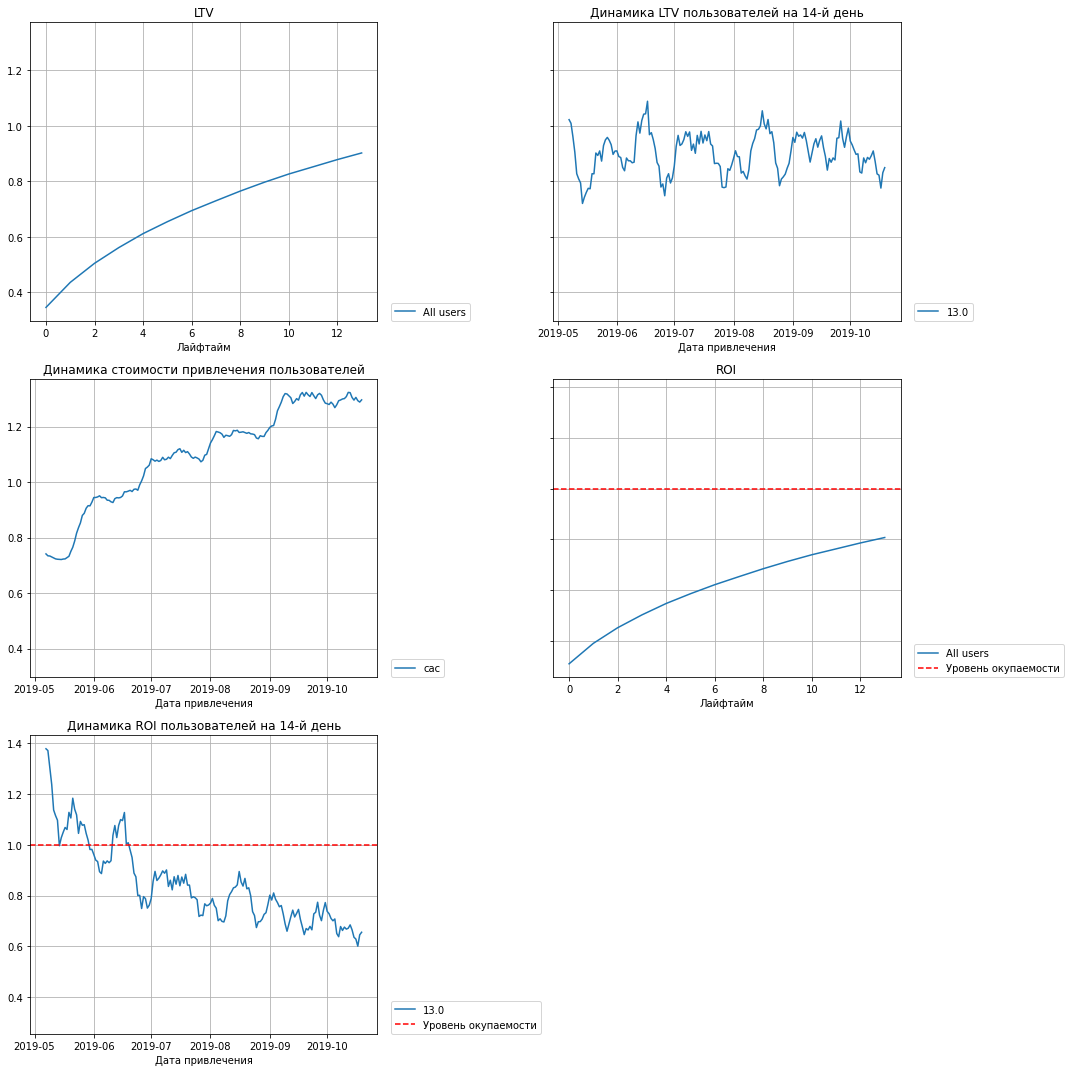

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_1, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы:**
- Реклама не окупается, к концу учетного периода чуть выше 80%
- Динамика жизни пользователей в целом стабильна
- Затраты на привлечение к концу учетного периода увеличиваются, но возврат инвестиций уменьшается, уходя с середины июня в зону неокупаемости.

#### 5.2 Конверсия и ее динамика

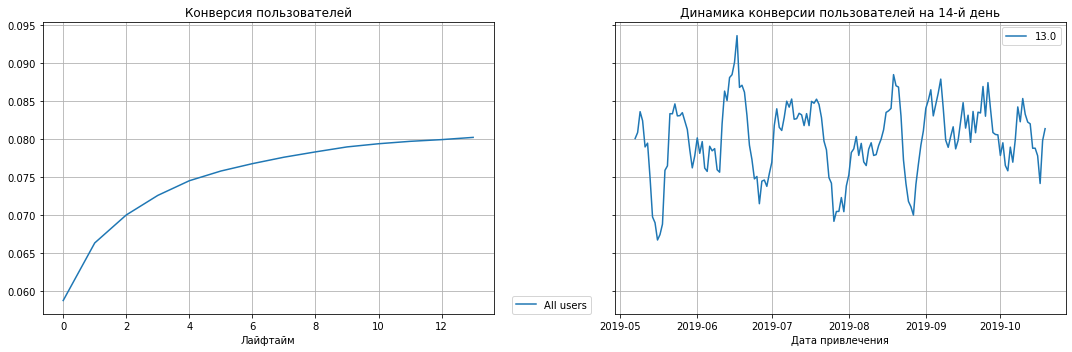

In [39]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_1, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**
- Конверсия общая держится на уровне **80%**
- Динамика конверсии так же стабильная, отрицательные пиковые значения приходятся на конец месяца, положительные  - на начало. Клиенты оплачивают новый период, либо решают не продлевать и перестают пользоваться подпиской.

#### 5.3 Удержание и его динамика

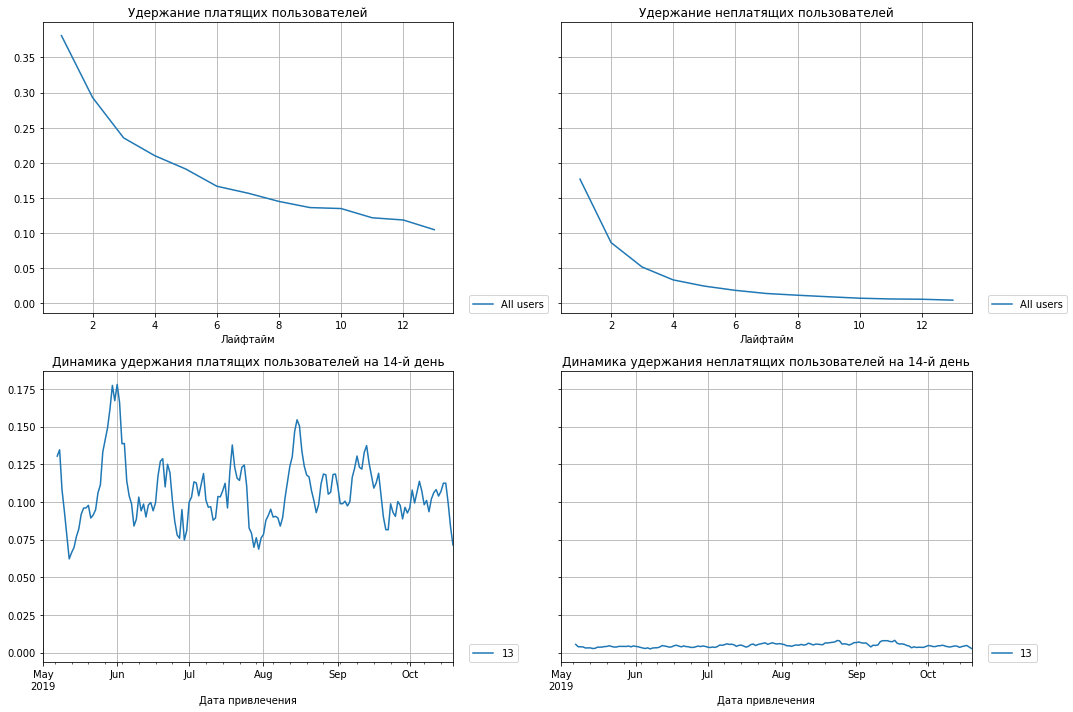

In [40]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**
- Кривая удержания без аномалий.
- Пиковые значения в динамике так же в целом стабильны. 

#### 5.4 Окупаемость по критериям

##### 5.4.1 Устройства

###### 5.4.1.1 LTV, CAC, ROI

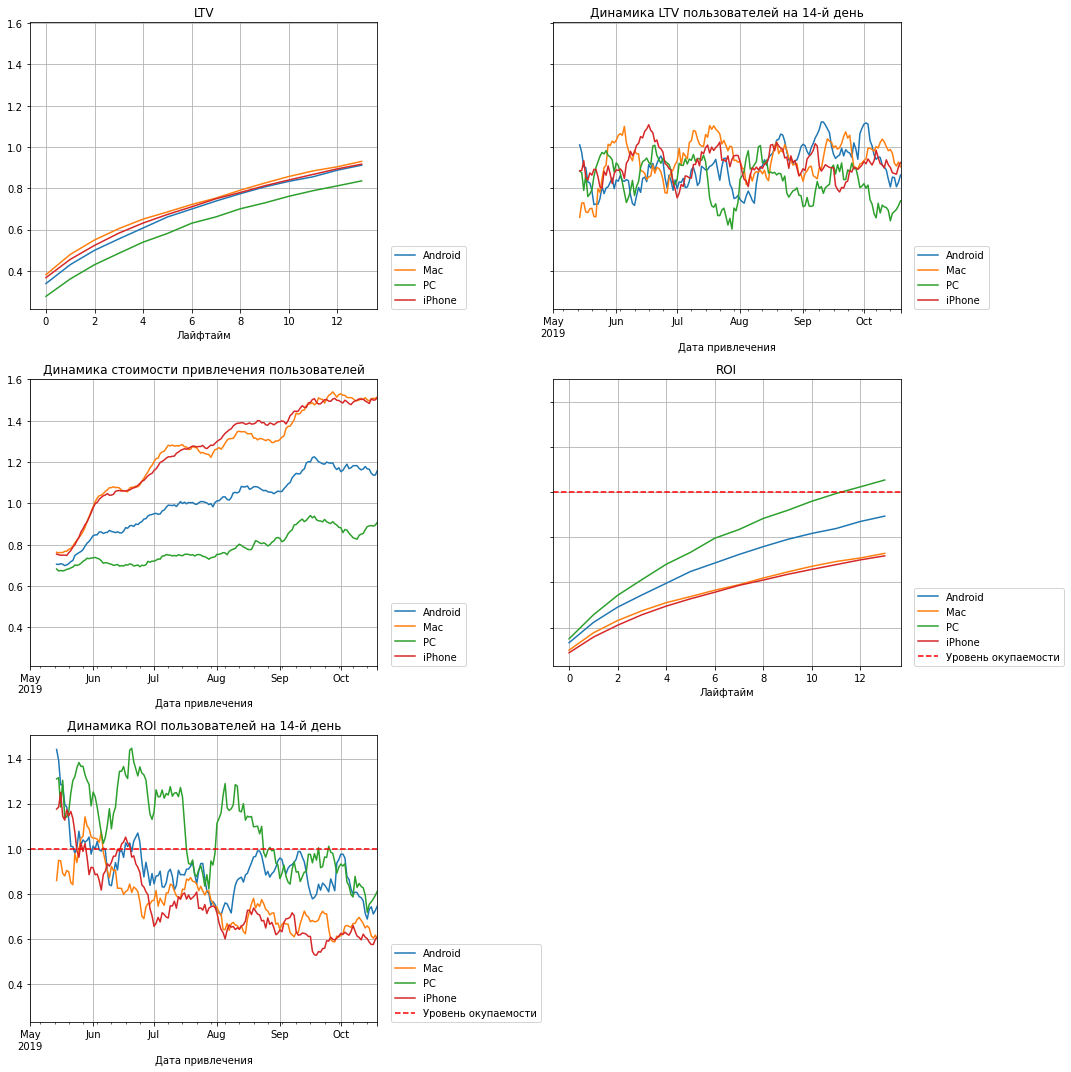

In [41]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод:**
- Затраты на привлечение пользователей **PC** минимальные, это единственная платформа, где затраты окупаются.
- Самые большие затраты у продуктов *Apple* - **iPhone** и **Mac**, но по окупаемости они являются аутсайдерами.
- В целом окупаемость идет на снижение и к концу месяца уходит в минус.
- Динамика LTV на всех платформах в целом стабильна.

###### 5.4.1.2 Conversion, retention

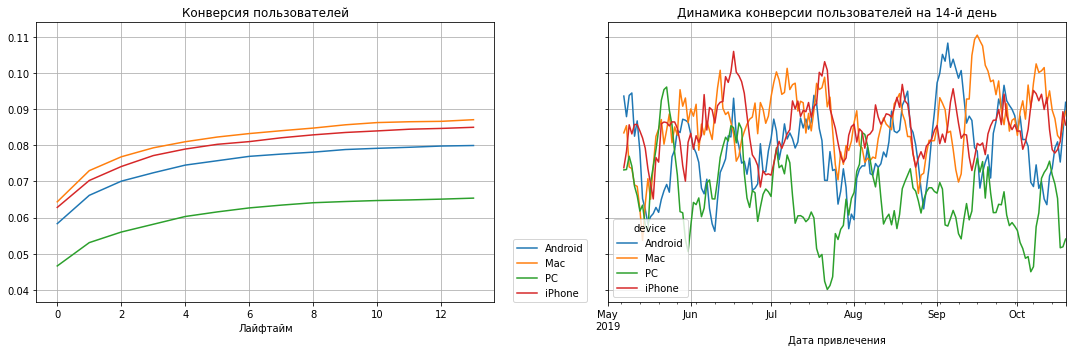

In [42]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

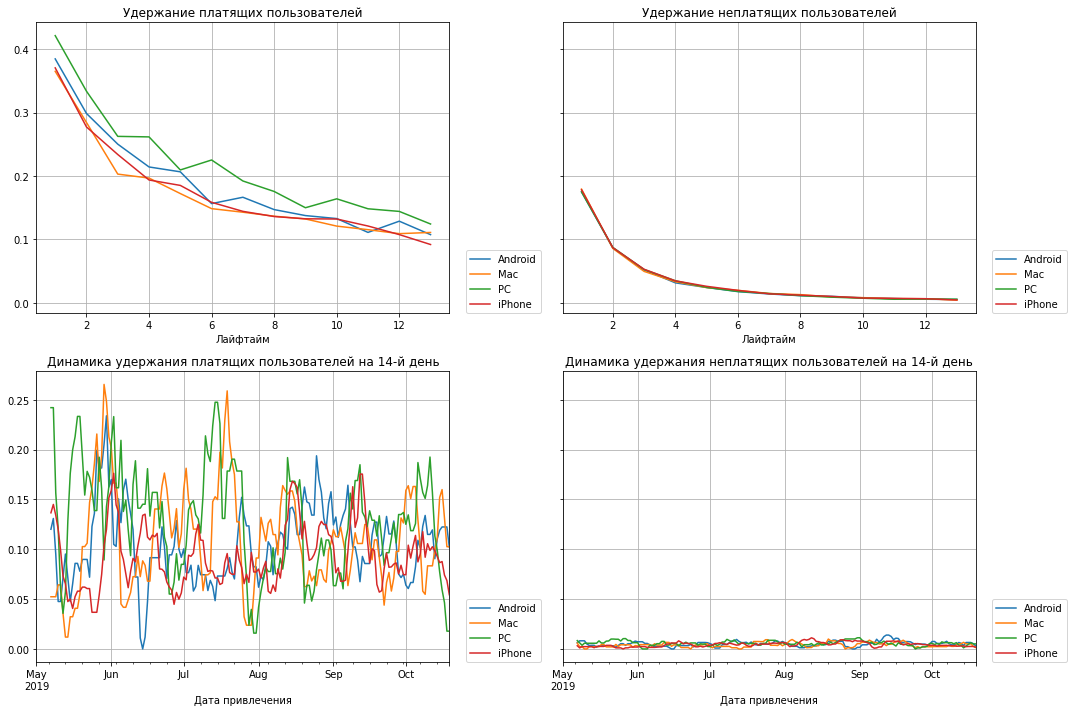

In [43]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы**: 
- Пользователи продукцией *Apple* окупаются лучше остальных, конверсия в районе **85%**.
- Самая низкая конверсия у пользователей *PC* - чуть ниже **70%**
- При высокой конверсии пользователи *Apple* удерживаются хуже всех.
- Пользователи *PC* наоборот лучше удерживаются, имея низкую конверсию.

##### 5.4.2 Регионы

###### 5.4.2.1 LTV, CAC, ROI

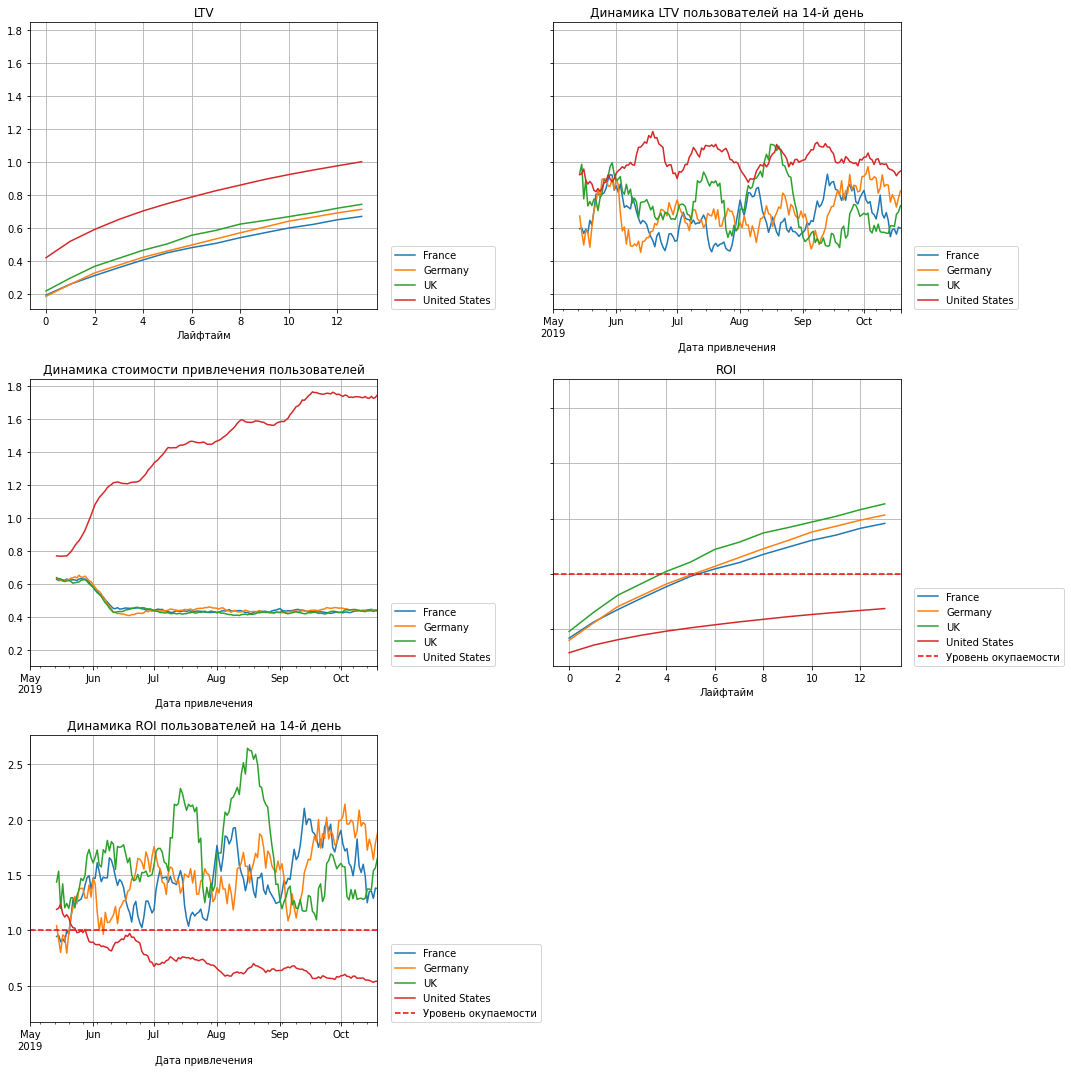

In [44]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**
- Пользователи **США** самые дорогие по стоиомости привлечения, при этом окупаемость в краткосрочном периоде отрицательная, а в долгосрочном уходит в минус к концу первого месяца учетного периода.
- В остальных странах затраты на рекламу уходят на практический одинаковый низкий уровень, что ведет к ее окупаемости.
- Американцы регулярнее европейцев совершают покупки - LTV США преобладает над Европой. Местами Великобритания догоняет США, но это краткосрочное явление.

###### 5.4.2.2 Conversion, retention

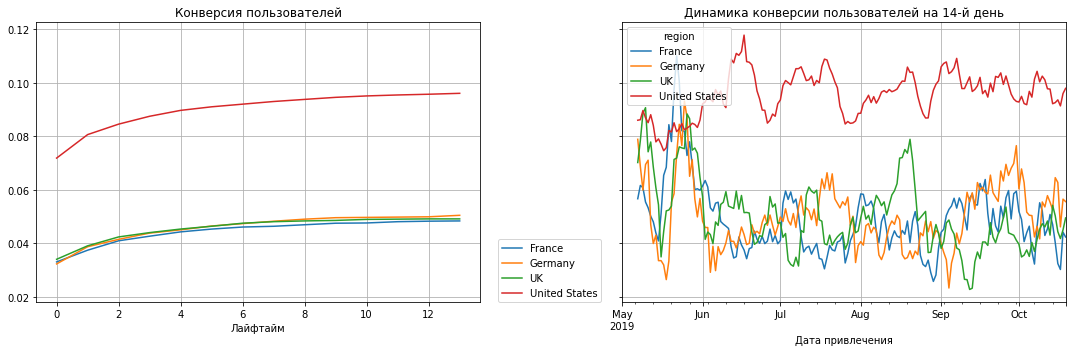

In [45]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

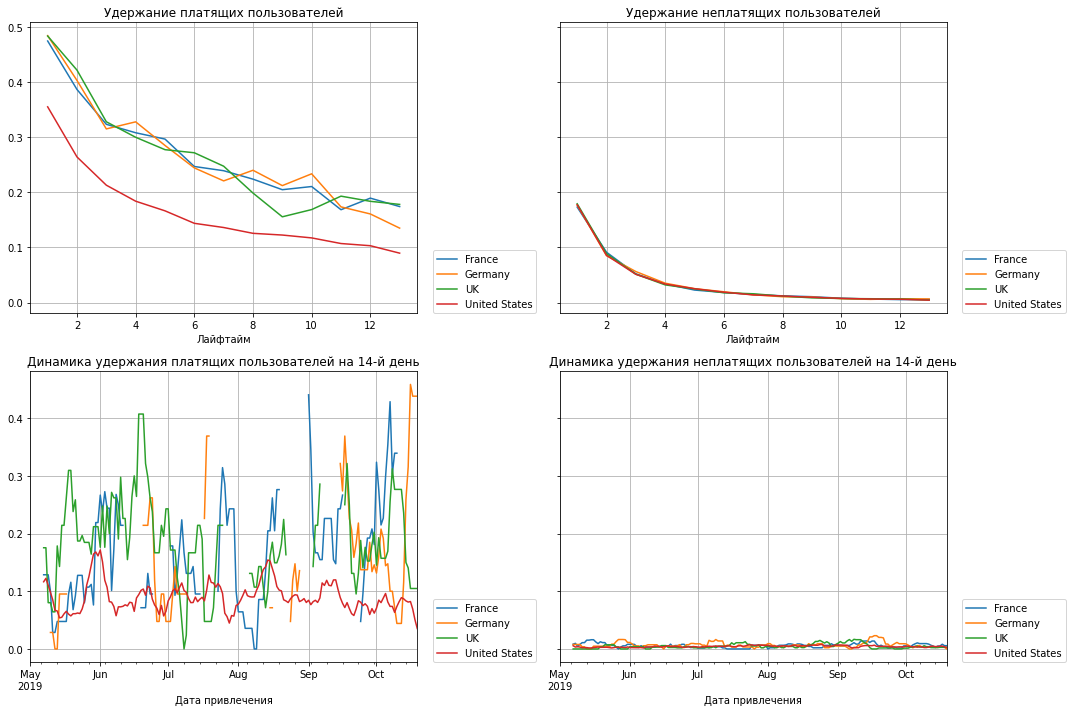

In [46]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**
- Пользователи **США** конвертируются лучше остальных стран - в районе **90%**, конверсия остальных стран держится в районе **50%**.
- При этом удержание пользователей **США** остает так же с большим отрывом от остальных стран.
- Несмотря на плохое удержание, пользователи **США** пользуются приложением постоянно, тогда как в других странах наблюдаются пробелы, что может говорить о том, что приложением перестают пользоваться, либо не совершают повторные покупки.

##### 5.4.3 Окупаемость рекламы по источникам

###### 5.4.3.1 LTV, CAC, ROI

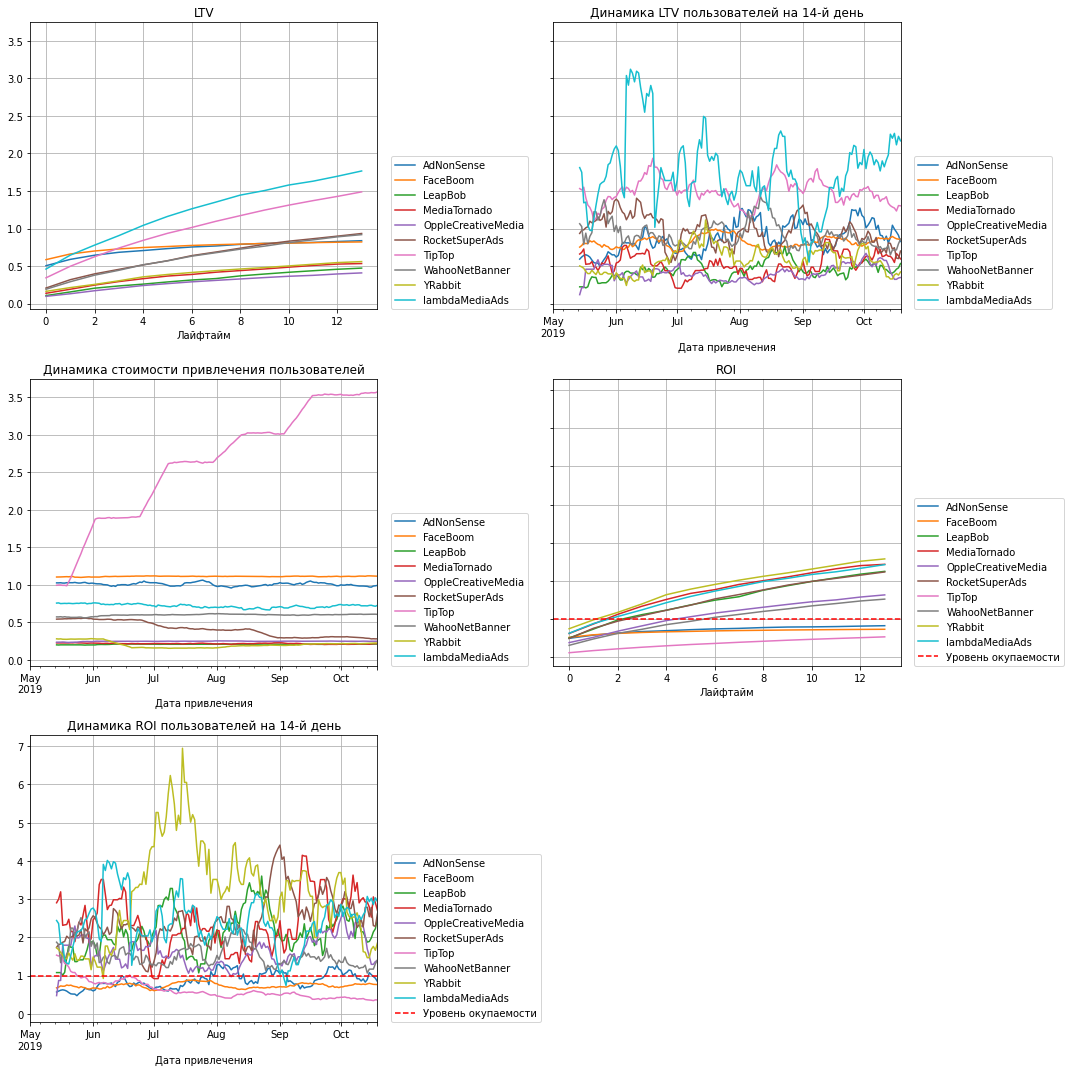

In [47]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**
- В отличие от остальных показателей, учет данных по каналам начинается с середины мая, возможно поздний запуск рекламы.
- Большая часть каналов на протяжении всего учетного периода тратят на рекламу одну и ту же сумму.
- Исключение составляют **TipTop**, вкладывающие каждый месяц все больше средств и **RocketSuprAds**, которые постепенно уменьшили затраты на рекламу.
- Самая высокая окупаемость у канала **YRabbit**, а самая низкая у **TipTop** с самыми большими затратами на рекламу
- По LTV выделяется **LambdaMediaAds**, который имеет самую высокую степень жизни клиентов. С июня по иилю зафиксирован очень большой прирост по сравнению с другими каналами. При этом затраты на рекламу у канала стабильно низкие. Так же высокий LTV показатель и у привычного нам **TipTop**

###### 5.4.3.2 Conversion, retention

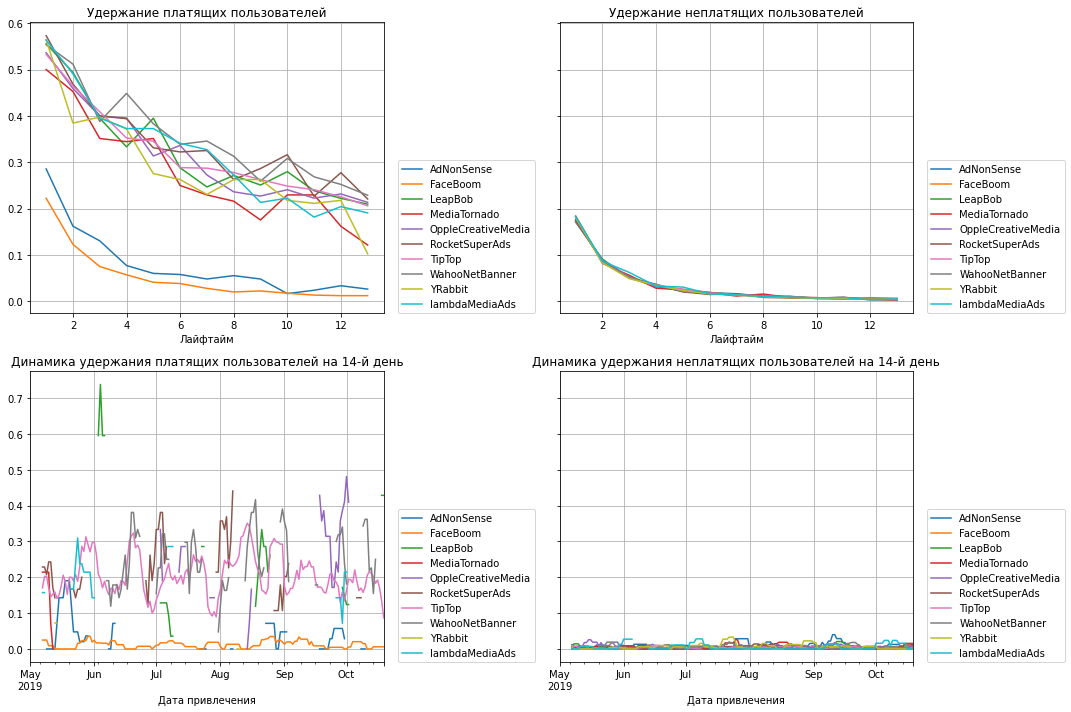

In [48]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод**:
- **AdNonSense** и **FaceBoom** имеют самые низкие показатели удержания среди всех каналов.
- Каналы **FaceBoom** и **TipTop** являются каналами чья динамика привлечения не прерывается в течение всего учетного периода.

##### 5.4.4 Разбивка каналов по регионам

Разделю каналы по рынкам - америнскому и европейскому

In [49]:
profiles_usa = profiles.query("region == 'United States' and channel != 'organic'") #USA
profiles_eu = profiles.query("region != 'United States'and channel != 'organic'") #EU

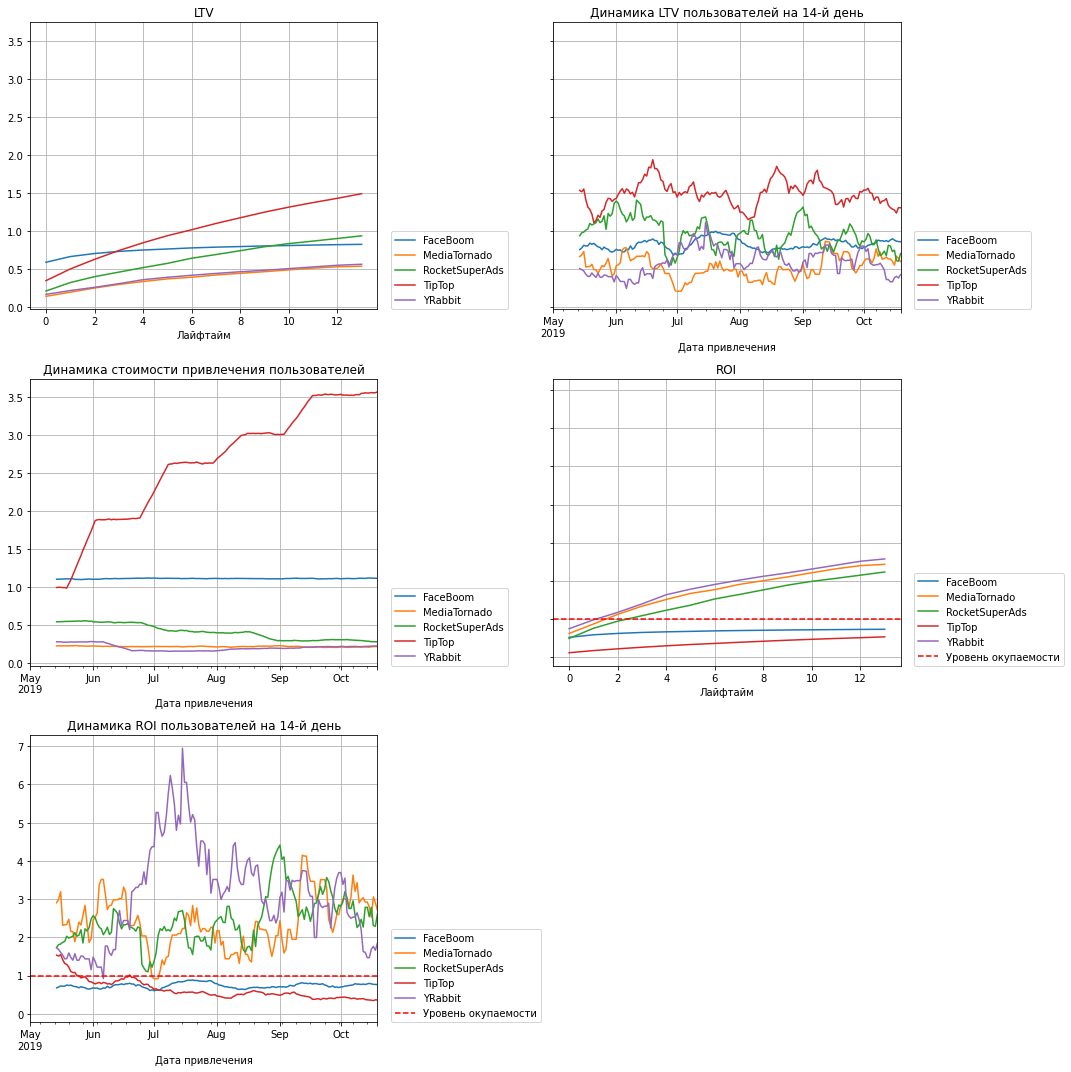

In [50]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

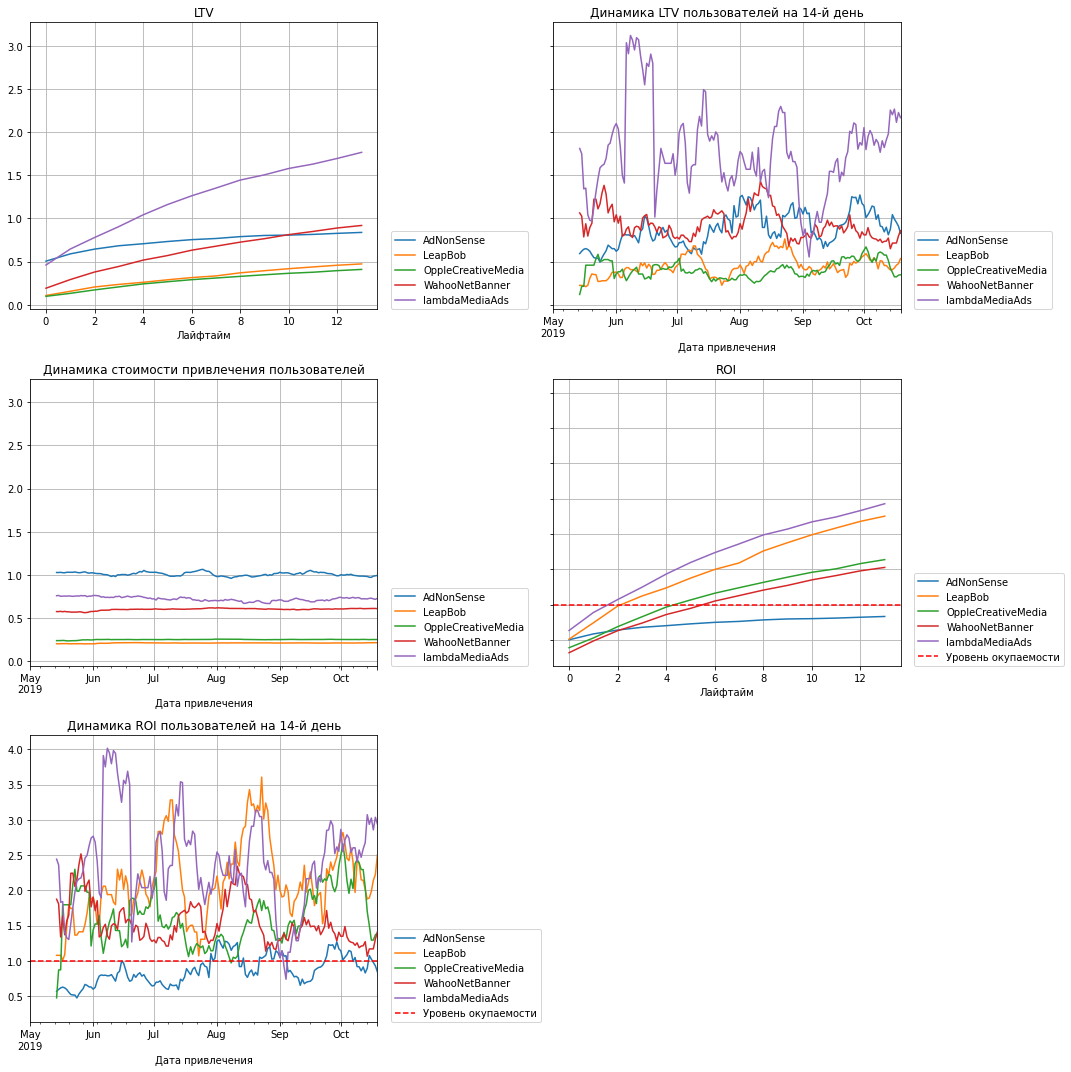

In [51]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### 6. Вывод


**Возможные причины неэффективности:**
- Большие расходы на привлечение пользователей из США, которые из всех рассматриваемых стран пользуются приложением стабильно.
- Некоторые каналы привлечения работают плохо, на что указывает прерывистая пользовательская активность.
- Большие расходы для пользователей продукцией Apple.

**Рекомендации:**
- Уменьшить расходы на рекламу для пользователей США. Они пользуются подпиской стабильно, острой необходимости вкладывать большие средства нет. 
- Это же применимо к пользователям Apple, так как данными устройствами пользуются много людей.
- Пересмотреть каналы привлечения и исключить те, где наименее слабый приток пользователей. На американском рынке ниже окупаемости находятся самые большие по числу клиентов каналы - **TipTop** и **FaceBoom**. Для них, в оснобенности для **TipTop**, целесообразно уменьшить расходы, так как ежемесячное увеличение вложенных средств не ведет к их окупаемости.
- На европейском рынке следует пересмотреть расходы по каналу **AdNonSense**, как единственному, который не окупается.

**Рекомендации по распределению бюджета:**
- На два рынка есть всего три канала, которые не окупаются - **TipTop** и **FaceBoom** для USA и **AdNonSense** для EU.
- Все эти три канала имеют максимальные в своих категориях траты на рекламу.
- Избыточный бюджет можно распределить на каналы, которые окупаются, но находятся близко к нижней границе.
- Для американского рынка это канал **RocketSuperAds**.
- Для европйского рынка это каналы **OppleCreativeMedia** и **WahooNetBanner**.
- Если увеличение затрат на рекламу приведет к уменьшению окупаемости выбранных каналов, то целесообразно либо снова пересмотреть каналы для перераспределения бюджета, либо рассмотреть вопрос об уменьшении бюджета на рекламу.

In [52]:
print('Код загружен')

Код загружен
